# Notebook Instructions
<i>You can run the notebook document sequentially (one cell at a time) by pressing <b>shift + enter</b>. While a cell is running, a [*] will display on the left. When it has been run, a number will display indicating the order in which it was run in the notebook [8].</i>

<i>Enter edit mode by pressing <b>`Enter`</b> or using the mouse to click on a cell's editor area. Edit mode is indicated by a green cell border and a prompt showing in the editor area.</i> <BR>
    
This course is based on specific versions of python packages. You can find the details of the same in <a href='https://quantra.quantinsti.com/quantra-notebook' target="_blank" >this manual</a>. The manual also explains how to use these codes in other versions of python packages. <BR>

# Returns

Return is a profit or loss derived from trading, investing or saving. In financial time series analysis, daily returns are used to measure the performance of a stock. Returns can be calculated using two different approaches:

1. Arithmetic Returns
2. Logarithmic Returns

In this notebook, you will learn to calculate arithmetic and logarithmic returns using the rebased series calculated earlier. Also, you will learn how to calculate cumulative returns. 

## Import libraries

In [8]:
# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%matplotlib inline

## Import data
### File name:
1. Jan_2010_to_Jan_2019_Rebased_Series.csv 

We will first import the rebased series that we created in the previous IPython notebook from Jan-2010 to Jan-2019. This data is available in the last unit of this course. You can find this file in the downloadables section of the course. 

We import these data using the function 'pandas.read_csv'. This function reads comma-separated values (csv) file into dataframe.

In [9]:
# Data is stored in the directory 'data_modules' 
relative_path = "../data_modules/"

# Reads and imports the rebased series using the function 'read_csv'
data = pd.read_csv(
    relative_path + 'Jan_2010_to_Jan_2019_Rebased_Series.csv', index_col=0, parse_dates=True)

# Convert index to pandas datetime
data.index = pd.to_datetime(data.index)

# Returns the top 2 rows of the dataframe
data.head(2)

,Open,High,Low,Close,USDGBP,SP500,adjustment_factor,relative_open,relative_high,relative_low,relative_close,rebased_open,rebased_high,rebased_low,rebased_close
Date,,,,,,,,,,,,,,,
2010-01-04,15.24,15.75,15.12,15.69,0.62,113.33,70.35,0.22,0.22,0.21,0.22,15.24,15.75,15.12,15.69
2010-01-05,15.74,16.21,15.70,16.20,0.63,113.63,71.06,0.22,0.23,0.22,0.23,15.58,16.05,15.54,16.04


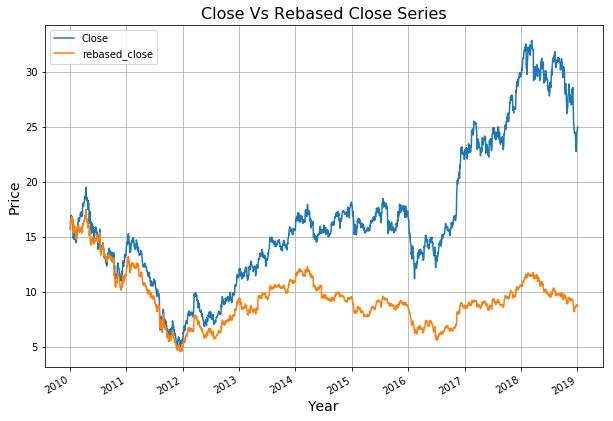

In [10]:
# Plot the graph
data[['Close', 'rebased_close']].plot(figsize=(10, 7))
plt.title('Close Vs Rebased Close Series', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price', fontsize=14)
# Add legend to the plot
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## 1. Arithmetic returns

Arithmetic returns are nothing but the percentage change of a price series.
We calculate the daily arithmetic returns of a series using the formula as shown:


Arithmetic Returns = (Current Price- Previous Price)/Previous Price


Here, we calculate the ratio of current price to the previous price for the relative series using the function 'pct.change()'.

In [11]:
# Calculate percent change for relative series
data['arithmetic_return'] = data['rebased_close'].pct_change()

# Drop NaN values from the dataset
data['arithmetic_return'].dropna(inplace=True)

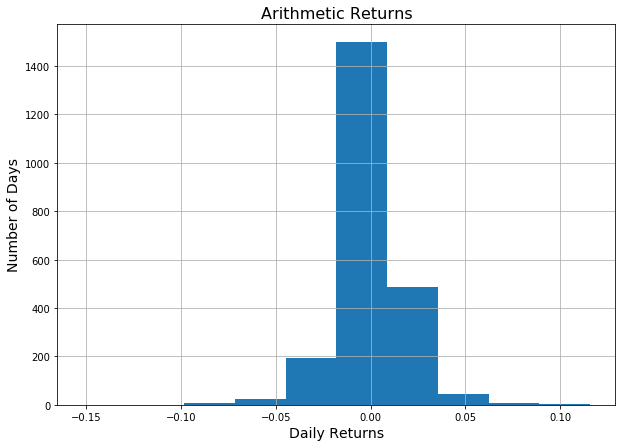

In [12]:
# Plot the histogram of the arithmetic return using the function 'plt.hist()' of matplotlib
plt.figure(figsize=[10, 7]) 
plt.hist(data['arithmetic_return'], bins=10) 
plt.title('Arithmetic Returns', fontsize=16)
plt.xlabel('Daily Returns', fontsize=14)
plt.ylabel('Number of Days', fontsize=14) 
# Add a grid
plt.grid()

###  Cumulative arithmetic returns

Cumulative arithmetic returns are calculated by taking the cumulative sum of the arithmetic returns.

In [13]:
# The function cumsum() is used to calculate cumulative sum of arithmetic returns
data['cumulative_arithmetic_return'] = (
    data['arithmetic_return']).cumsum()

In [14]:
# Drop NaN values from the dataset
data['cumulative_arithmetic_return'].dropna(inplace=True)

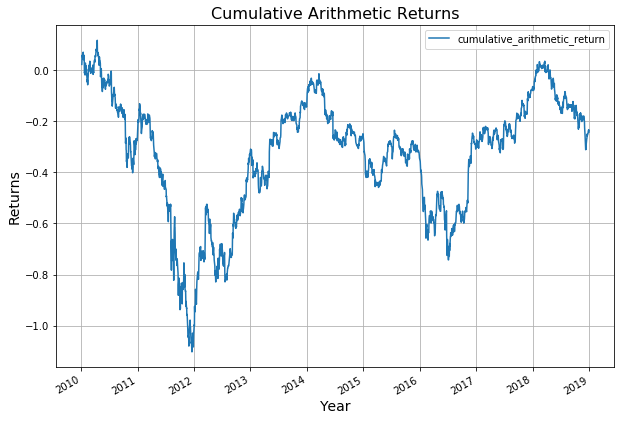

In [15]:
# Plot the cumulative arithmetic return 
data['cumulative_arithmetic_return'].plot(figsize=(10, 7))
plt.title('Cumulative Arithmetic Returns', fontsize=16)
plt.ylabel('Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Places legend to the axis
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## 2. Logarithmic returns

Logarithmic returns are calculated by taking the natural logarithm of the current day closing price divided by the previous day closing price.
Logarithmic Returns = Logarithm of (Current Price / Previous Price)

Here, we calculate the ratio of the current price to the previous price and then apply a logarithm over this value. Using the function np.log(x), you can calculate the natural logarithm of x.

In [16]:
# The function 'np.log(x)' calculates natural log of x
data['log_return'] = np.log(
    data['rebased_close']/data['rebased_close'].shift(1))

In [17]:
# Drop NaN values from the dataset
data['log_return'].dropna(inplace=True)

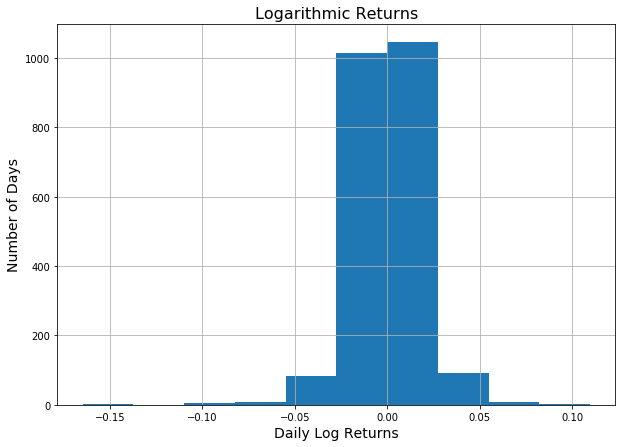

In [18]:
# Plot the histogram of the logarithmic returns using the function 'plt.hist()' of matplotlib
plt.figure(figsize=[10, 7])
plt.hist(data['log_return'], bins=10)
plt.title('Logarithmic Returns', fontsize=16)
plt.xlabel('Daily Log Returns', fontsize=14)
plt.ylabel('Number of Days', fontsize=14)
# Add a grid
plt.grid()

### Cumulative logarithmic returns

Cumulative logarithmic returns are calculated by taking the cumulative sum of the logarithmic returns.

In [19]:
# The function cumsum() is used to calculate cumulative sum of logarithmic returns
data['cumulative_log_return'] = (data['log_return']).cumsum()

In [20]:
# Drop NaN values from the dataset
data['cumulative_log_return'].dropna(inplace=True)

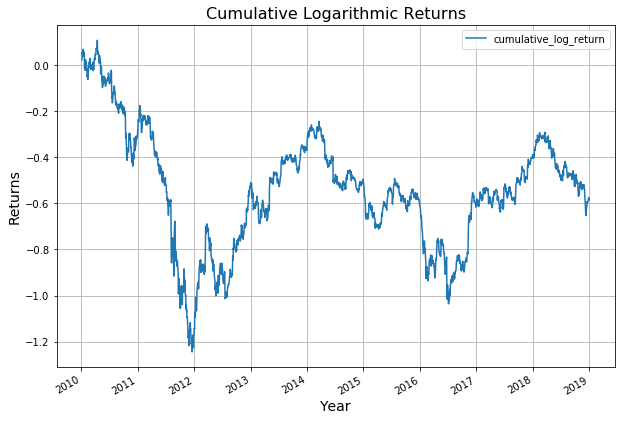

In [21]:
# Plots the cumulative logarithmic return using the function 'plt.hist()' of matplotlib
data['cumulative_log_return'].plot(figsize=(10, 7))
plt.title('Cumulative Logarithmic Returns', fontsize=16)
plt.ylabel('Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)
# Places legend to the axis
plt.legend()
# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## Arithmetic vs logarithmic returns

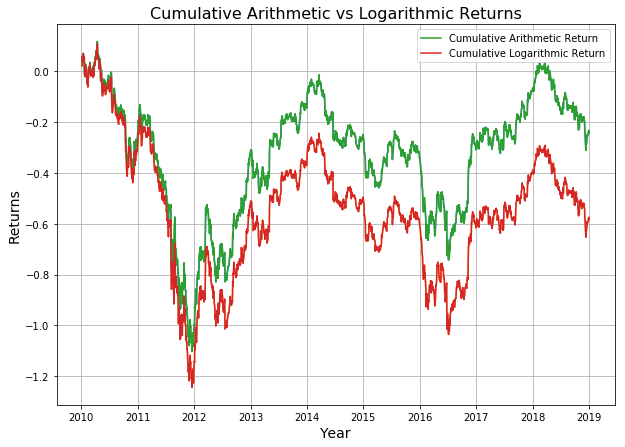

In [22]:
# Plots the cumulative logarithmic return using the function 'plt.hist()' of matplotlib
plt.figure(figsize=(10, 7))
plt.plot(data[['cumulative_arithmetic_return','cumulative_log_return']])
plt.title('Cumulative Arithmetic vs Logarithmic Returns', fontsize=16)
plt.ylabel('Returns', fontsize=14)
plt.xlabel('Year', fontsize=14)

# Add legend on the plot
line_up, = plt.plot(data['cumulative_arithmetic_return'], label='Cumulative Arithmetic Return')
line_down, = plt.plot(data['cumulative_log_return'], label='Cumulative Logarithmic Return')
plt.legend(handles=[line_up, line_down])
plt.legend()

# Add grid to the plot
plt.grid()
# Display the graph
plt.show()

## Conclusion 
Log returns are time-additive. That is, n-period log return can be calculated by adding the consecutive single period log-returns which is not possible for simple arithmetic returns. This makes manipulations much easier. We will be using the log returns in the upcoming notebooks. In the next unit, you will learn how to identify and detect regime change.